# NLP and Supervised Learning

## Classification of Text data

The goal is to predict if a comment is positive, neutral, or negative.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("comments.csv")
df.head()

,summary,comment
0,neutral,looking for cheap flight to vegas
1,neutral,"took delivery of N8661A, a new Boeing 737-8H4 ..."
2,positive,Thanks for the info! Have a good day.
3,negative,when I corrected the attendants error she gave...
4,positive,hey at least you guys are honest with your cus...


<Axes: xlabel='summary', ylabel='count'>

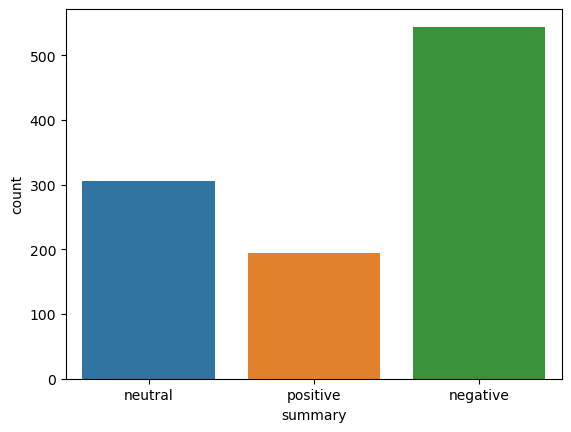

In [3]:
sns.countplot(data=df, x='summary')

In [4]:
y = df['summary']
X = df['comment']

## Train and Test splits

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectorization

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [9]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Model Comparisons - Naive Bayes, LogisticRegression, LinearSVC

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [12]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

## Performance Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    cnf_matrix = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()

NB MODEL
              precision    recall  f1-score   support

    negative       0.60      0.98      0.74       115
     neutral       0.75      0.21      0.33        57
    positive       1.00      0.11      0.20        37

    accuracy                           0.62       209
   macro avg       0.78      0.43      0.42       209
weighted avg       0.71      0.62      0.53       209



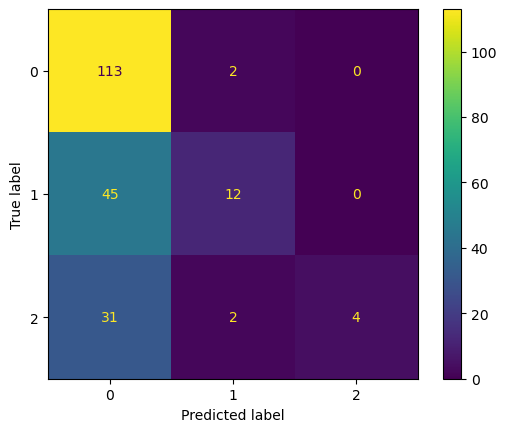

In [15]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.71      0.94      0.81       115
     neutral       0.62      0.37      0.46        57
    positive       0.78      0.49      0.60        37

    accuracy                           0.70       209
   macro avg       0.70      0.60      0.62       209
weighted avg       0.70      0.70      0.68       209



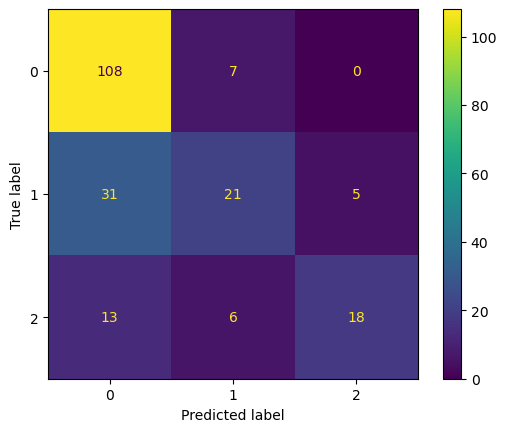

In [16]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.76      0.84      0.80       115
     neutral       0.55      0.51      0.53        57
    positive       0.72      0.57      0.64        37

    accuracy                           0.70       209
   macro avg       0.68      0.64      0.66       209
weighted avg       0.70      0.70      0.70       209



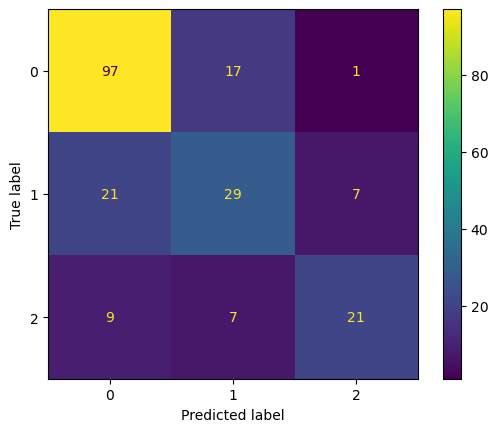

In [17]:
print('SVC')
report(svc)

## Finalizing a pipeline for deployment on new comments

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['comment'],df['summary'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [20]:
new_comment = ['good flight']
pipe.predict(new_comment)

array(['positive'], dtype=object)

In [21]:
new_comment = ['bad flight']
pipe.predict(new_comment)

array(['negative'], dtype=object)

In [22]:
new_comment = ['ok flight']
pipe.predict(new_comment)

array(['neutral'], dtype=object)